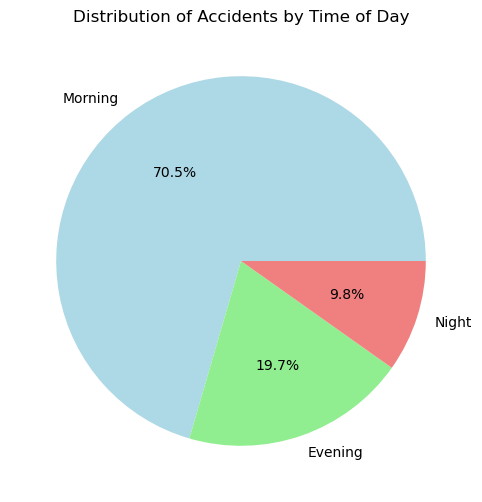

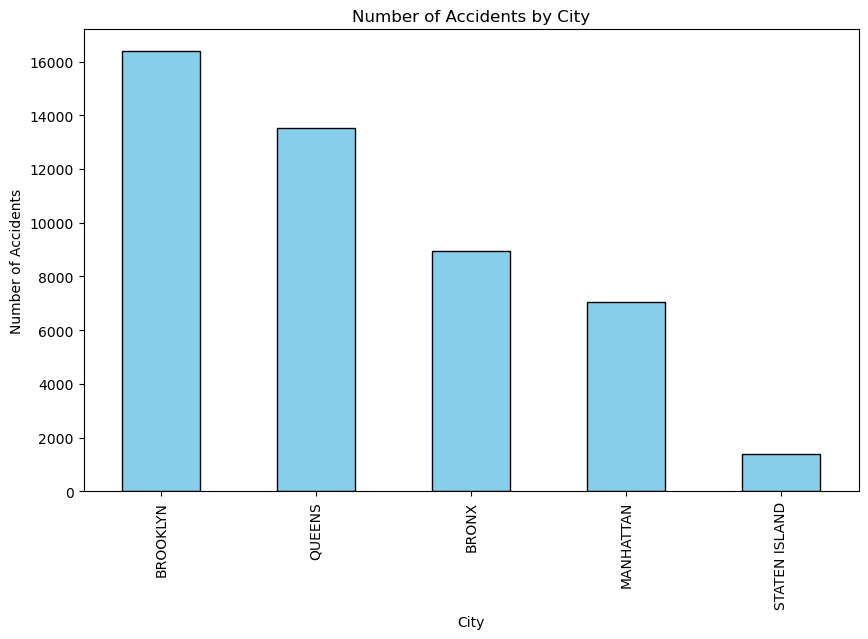

C:\Users\Horva\anaconda3\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


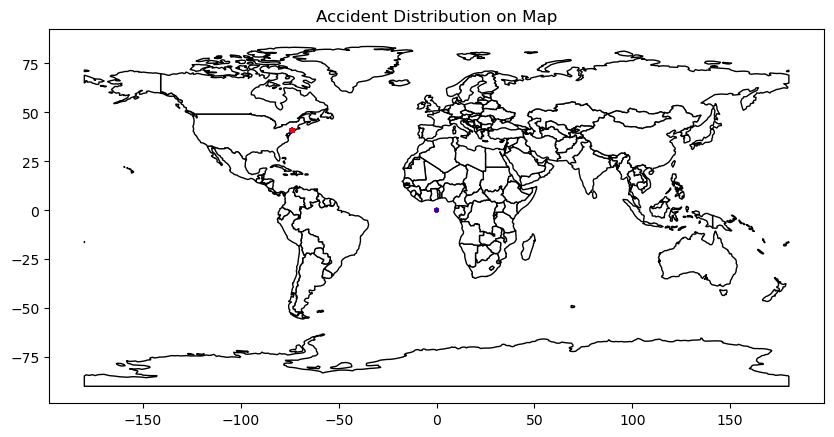

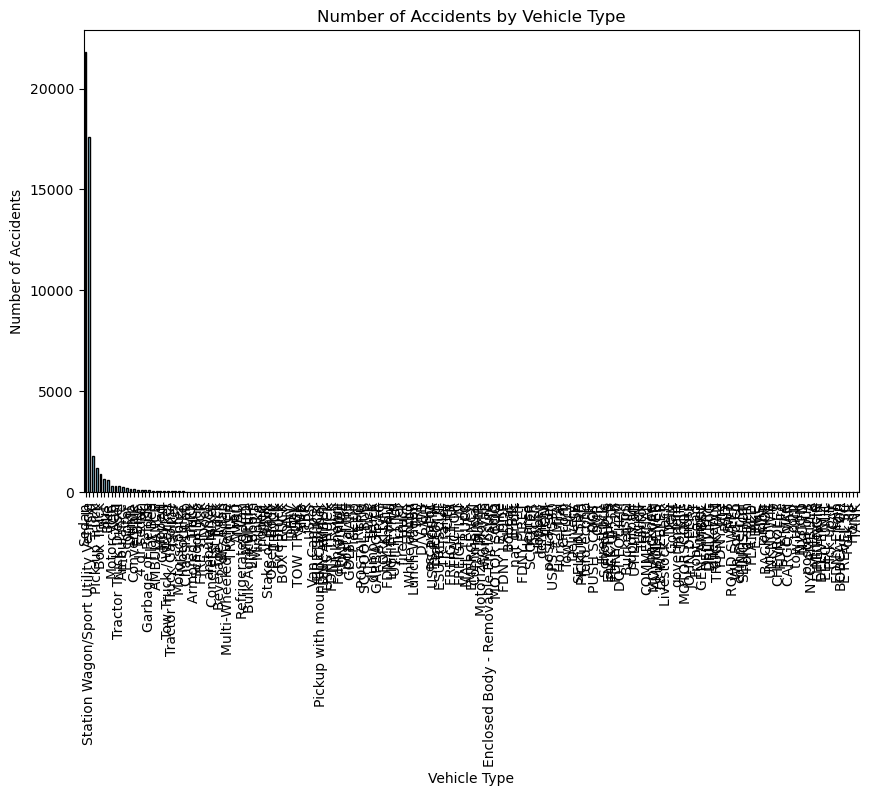

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

# Load the CSV data
data = pd.read_csv("C:/Users/Horva/Downloads/NYC_Data.csv")

# 1. Pie Chart - Distribution of accidents by time of day (Morning, Evening, Night)
# Assuming you have a 'Crash_Time' column as a datetime object
data['Crash_Time'] = pd.to_datetime(data['Crash_Time'])
data['Time_of_Day'] = pd.cut(data['Crash_Time'].dt.hour, bins=[0, 6, 18, 24], labels=['Night', 'Morning', 'Evening'])
time_of_day_counts = data['Time_of_Day'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(time_of_day_counts, labels=time_of_day_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Accidents by Time of Day')
plt.show()

# 2. Bar Chart - Number of accidents by city
city_accident_counts = data['City_Name'].value_counts()
plt.figure(figsize=(10, 6))
city_accident_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Accidents by City')
plt.xlabel('City')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.show()

# 3. Map - Top 3 cities for most accidents in RED, bottom 3 in BLUE
top_cities = city_accident_counts.head(3).index
bottom_cities = city_accident_counts.tail(3).index

# Assuming you have latitude and longitude columns in your dataset
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['Longitude'], data['Latitude']))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 10), color='white', edgecolor='black')
gdf.plot(ax=ax, color=['red' if city in top_cities else 'blue' if city in bottom_cities else 'gray' for city in data['City_Name']], markersize=5)
plt.title('Accident Distribution on Map')
plt.show()

# 4. Bar Chart - Number of accidents by vehicle type
vehicle_type_counts = data['Vechicle_Type'].value_counts()
plt.figure(figsize=(10, 6))
vehicle_type_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Accidents by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.show()
